<a href="https://colab.research.google.com/github/SwadhiRSSRS/Computer-Vision-and-its-Applications/blob/main/CVA%20EX%204/AI19641_CVA_EX_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX 4

Design and train a model for objects detection with real time example

In [ ]:
import torch
import cv2

In [ ]:
# load yolov5 model
model=torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-13 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
#load object names
object_names=model.module.names if hasattr(model,'module')else model.names

In [ ]:
#load an image and detect objects
image=cv2.imread("/content/BikesHelmets4.png")
results=model(image)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
#draw bounding boxes and class names around the detected objects
for detection in results.xyxy[0]:
  xmin,ymin,xmax,ymax=detection[0],detection[1],detection[2],detection[3]
  class_index=int(detection[5])
  class_name=object_names[class_index]

  # Convert coordinates to integers
  xmin, ymin, xmax, ymax = int(xmin.item()), int(ymin.item()), int(xmax.item()), int(ymax.item())

  cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(0,255,0),2)
  cv2.putText(image,class_name,(xmin,ymin-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)

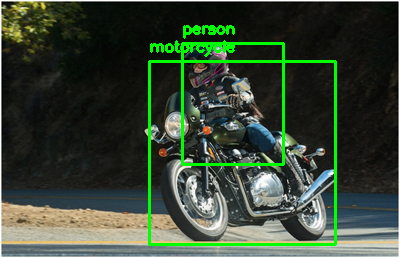

In [ ]:
#display the image with bounding boxes and class names
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()